In [19]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import shutil

Gaussian Filter

Sobel & Canny Edge Detectors

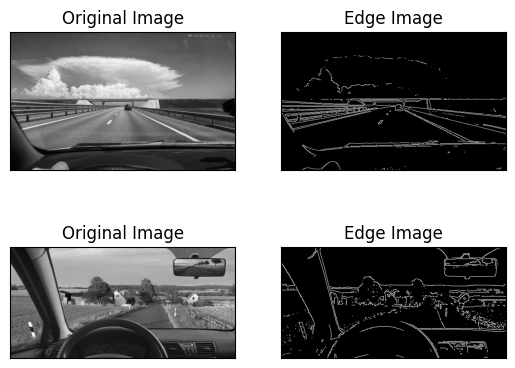

In [92]:
# Load the color image in grayscale
img = cv2.imread('demo2_images/road1.jpg', 0)
img2 = cv2.imread('demo2_images/road2.jpg',0)

# Apply the Canny edge detection
edges = cv2.Canny(img, 240, 250)
edges2 = cv2.Canny(img2, 240, 250)

# Display the originals and the edges for img and img2
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img2,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(edges2, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Fabric Classificaiton

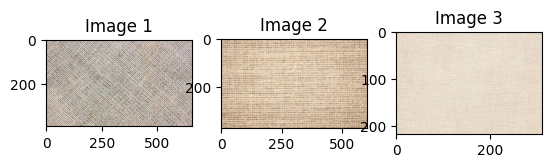

In [2]:
#Open image files with cv2
img1 = cv2.imread('demo2_images/woven1.jpg')
img2 = cv2.imread('demo2_images/woven2.jpg')
img3 = cv2.imread('demo2_images/woven3.jpg')

# Display 3 images side by side 
plt.subplot(131),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)),plt.title('Image 1')
plt.subplot(132),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)),plt.title('Image 2')
plt.subplot(133),plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.title('Image 3')
plt.show()

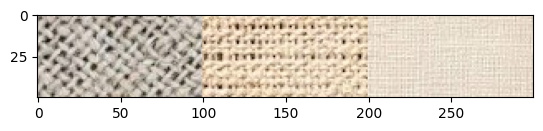

In [3]:
# Crop out a 100x50 region of interest from each image
img1_crop = img1[100:150, 100:200]
img2_crop = img2[100:150, 100:200]
img3_crop = img3[100:150, 100:200]

# Create a new image by concatenating the 3 cropped images horizontally
img_concat = cv2.hconcat([img1_crop, img2_crop, img3_crop])

# Display the concatenated image
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# Create a directory inside demo2_images gabor_output
os.makedirs('demo2_images/gabor_output', exist_ok=True)


In [ ]:
# Convert img_concat to grayscale
img_concat_gray = cv2.cvtColor(img_concat, cv2.COLOR_BGR2GRAY)

# Define the gabor filter bank
kernels = []
params = []

for theta in range(4):
    theta_val = theta / 4. * np.pi
    for sigma in (1, 3):
        for lamda in np.arange(0, np.pi, np.pi / 4):
            for gamma in (0.05, 0.5):
                kernel = cv2.getGaborKernel((21, 21), sigma, theta_val, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernel /= 1.5 * kernel.sum()
                kernels.append(kernel)
                params.append((theta_val, sigma, lamda, gamma))

# Apply the gabor filter bank to the image
filtered = []
for kernel in kernels:
    filtered.append(cv2.filter2D(img_concat_gray, cv2.CV_8UC3, kernel))

# Ensure the output directory exists
output_dir = 'demo2_images/gabor_output'
os.makedirs(output_dir, exist_ok=True)

# Save the filtered images with parameter descriptions in the file name
for i, (img, param) in enumerate(zip(filtered, params)):
    theta_val, sigma, lamda, gamma = param
    filename = f'gabor_theta{theta_val:.2f}_sigma{sigma}_lambda{lamda:.2f}_gamma{gamma:.2f}.jpg'
    filepath = os.path.join(output_dir, filename)   
    cv2.imwrite(filepath, img)




(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)
(50, 300)


In [87]:
roiData = []
# Evaluate roi aggregate statistics for each filtered image
for i, (img, param) in enumerate(zip(filtered, params)):

    if i == 0:
        # print img dimensions
        print(img.shape)
    # Break img into 3 regions of interest
    roi1 = img[:, :100]
    roi2 = img[:, 100:200]
    roi3 = img[:, 200:]
    # Calculate the mean, standard deviation, and skewness of each roi
    roi1_mean = roi1.mean(); roi1_std = roi1.std(); roi1_skew = cv2.moments(roi1)['mu11']
    roi2_mean = roi2.mean(); roi2_std = roi2.std(); roi2_skew = cv2.moments(roi2)['mu11']
    roi3_mean = roi3.mean(); roi3_std = roi3.std(); roi3_skew = cv2.moments(roi3)['mu11']
    # Append the aggregate statistics to roiData
    roiData.append([roi1_mean, roi1_std, roi1_skew, roi2_mean, roi2_std, roi2_skew, roi3_mean, roi3_std, roi3_skew])

(50, 300)


Liquid Level Evaluation

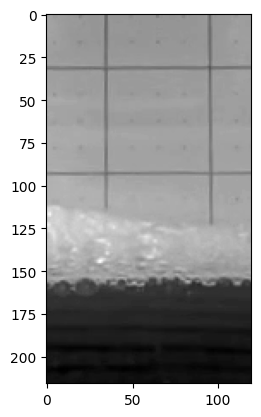

In [62]:
# Initialize a video reader object
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')

# Extract video metadata
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# Read in the 100th frame
cap.set(cv2.CAP_PROP_POS_FRAMES, 100)
ret, frame = cap.read()

# Convert the frame to grayscale
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Show the frame
plt.imshow(frame_gray, cmap='gray')
plt.show()

ROI 1: Mean = 123.59, Std = 11.93
ROI 2: Mean = 169.62, Std = 4.05
ROI 3: Mean = 36.53, Std = 3.85


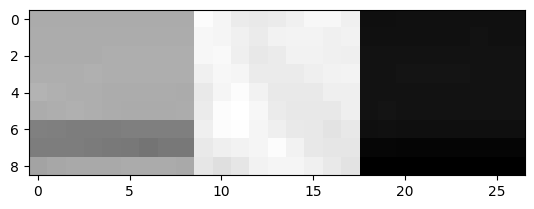

In [77]:
ws = 9

# Crop out 3 regions of interest from the frame
roi1 = frame_gray[25:25 + ws, 60:60 + ws]
roi2 = frame_gray[125:125 + ws, 10:10 + ws]
roi3 = frame_gray[175:175 + ws, 10:10 + ws]

# Create a new image by concatenating the 3 ROIs horizontally
roi_concat = cv2.hconcat([roi1, roi2, roi3])

# Evaluate mean and standard deviation of each ROI
roi1_mean = roi1.mean(); roi1_std = roi1.std()
roi2_mean = roi2.mean(); roi2_std = roi2.std()
roi3_mean = roi3.mean(); roi3_std = roi3.std()

# Display the mean and standard deviation of each ROI
print(f'ROI 1: Mean = {roi1_mean:.2f}, Std = {roi1_std:.2f}')
print(f'ROI 2: Mean = {roi2_mean:.2f}, Std = {roi2_std:.2f}')
print(f'ROI 3: Mean = {roi3_mean:.2f}, Std = {roi3_std:.2f}')


# Display the concatenated ROIs
plt.imshow(roi_concat, cmap='gray')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_5496\2077968043.py:3: RuntimeWarning: Mean of empty slice.
  return np.abs(imageA.mean() - imageB.mean())


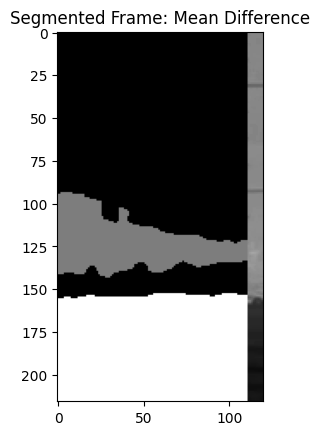

In [81]:
# Evaluate difference in mean value of two images
def mean_diff(imageA, imageB):
    return np.abs(imageA.mean() - imageB.mean())

# Create a copy of the frame
frame_seg_mean = frame_gray.copy()


def evalRoi(frame_seg_mean, i, j, roi):
    md1 = mean_diff(roi, roi1)
    md2 = mean_diff(roi, roi2)
    md3 = mean_diff(roi, roi3)
    # Find which mean difference value is the smallest
    min_md = min(md1, md2, md3)
    # If md1 is the smallest, set the pixel to 0, md2 is smallest then 125, md3 is smallest then 255
    if min_md == md1:
        frame_seg_mean[i, j] = 0
    elif min_md == md2:
        frame_seg_mean[i, j] = 125
    else:
        frame_seg_mean[i, j] = 255

# Loop through all pixels in the frame 
for i in range(height - ws):
    for j in range(width - ws):
        roi = frame_gray[i:i + ws, j:j + ws]
        evalRoi(frame_seg_mean, i, j, roi)

# Loop through the leftover pixels in the bottom edge
for i in range(height - ws, height):
    for j in range(width - ws):
        roi = frame_gray[i:i + ws, j-ws:j]
        evalRoi(frame_seg_mean, i, j, roi)


# Display the segmented frame
plt.imshow(frame_seg_mean, cmap='gray'); plt.title('Segmented Frame: Mean Difference'); plt.show()

